## Simulazione II Esame di Metodi Numerici Soluzioni##

Nel file ``Test_I.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. 
- Risolvere i 3 sistemi lineari aventi matrice dei coefficienti A1 e termine noto b1, matrice dei coefficienti A2 e termine noto b2, matrice dei coefficienti A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.

                                                                                            punti 12
                                                                                            
- Verificare se le matrici sono malcondizionate. Indicare la formula matematica dell'indice di condizionamento e spiegare perchè è importante conoscere l'indice di condizionamento di una matrice.
                                                                                           
                                                                                           punti 2

- Dopo aver copiato nel numpy array b1p il termine noto b1 del primo sistema lineare con matrice dei coefficienti A1, effettuarne una perturbazione della prima componente nel seguente modo b1p[0]=b1p[0]+0.001*b1p[0]. Risolvere il sistema lineare con matrice A1 e termine noto perturbato b1p. Calcolare l'errore relativo sulla soluzione e l'errore relativo sul termine noto, descrivere ciò che si verifica giustificandolo alla luce della teoria.

                                                                                           punti 2


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Test_II.mat')``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

``A2=dati["A2"] ``

``A2=A2.astype(float)``

`` b2=dati["b2"] ``

`` b2=b2.astype(float)``

``A3=dati["A3"] ``

``A3=A3.astype(float)``

`` b3=dati["b3"] ``

`` b3=b3.astype(float)``



                                                                    Punti 16

In [107]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import math
import sympy as sym
import sys, os

sys.path.append(os.path.abspath('../../Scheletri'))
import Schel_FULL as sf

dati = loadmat('Test_I.mat')
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"] 
b1=b1.astype(float)
A2=dati["A2"] 
A2=A2.astype(float)
b2=dati["b2"] 
b2=b2.astype(float)
A3=dati["A3"] 
A3=A3.astype(float)
b3=dati["b3"] 
b3=b3.astype(float)

La matrice è strettamente dominante sulla diagonale.
Condizionamento di A1 =  120.61487223223219  con  10 righe e  10  colonne,  rango massimo simmetrica NON def.pos.
Condizionamento di A12 =  10000.000000001106  con  25 righe e  10  colonne,  rango massimo non simmetrica NON def.pos.
Condizionamento di A3 =  103.08686891981736  con  225 righe e  225  colonne,  rango massimo simmetrica def.pos.
False
rango= 10
raggio spettrale jacobi 0.9807852804032325
[[1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99999999]
 [0.99999999]
 [0.9999999

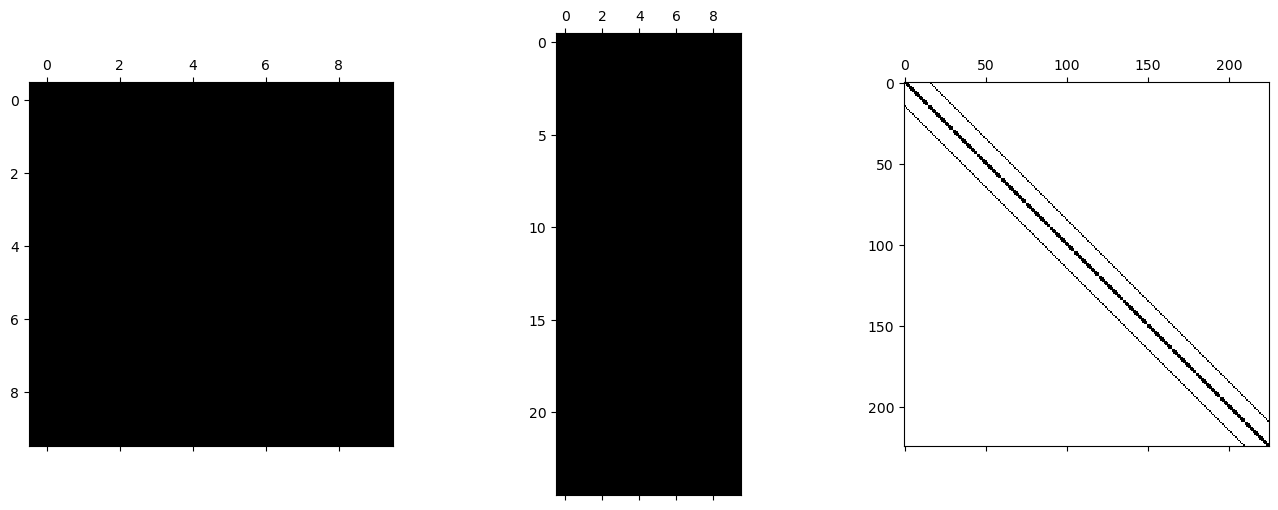

In [108]:
import numpy as np

def is_strictly_diagonally_dominant(A):
    """
    Verifica se la matrice A è strettamente dominante sulla diagonale.
    """
    A = np.array(A)
    n = A.shape[0]  # Numero di righe (e colonne) della matrice
    for i in range(n):
        diagonal_element = abs(A[i, i])
        off_diagonal_sum = np.sum(np.abs(A[i, :])) - diagonal_element
        if diagonal_element <= off_diagonal_sum:
            return False
    return True

# Esempio di matrice
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 2, 6]])

# Verifica se la matrice è strettamente dominante sulla diagonale
if is_strictly_diagonally_dominant(A):
    print("La matrice è strettamente dominante sulla diagonale.")
else:
    print("La matrice non è strettamente dominante sulla diagonale.")



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 6))


ax1.spy(A1)
ax2.spy(A2)
ax3.spy(A3)


rango1 = "rango non massimo"
rango2 = "rango non massimo"
rango3 = "rango non massimo"

simmetria1 = "non simmetrica"
simmetria2 = "non simmetrica"
simmetria3 = "non simmetrica"

definita_pos1 = "NON def.pos."
definita_pos2 = "NON def.pos."
definita_pos3 = "NON def.pos."


if npl.det(A1) != 0:
    rango1 = "rango massimo"
if npl.matrix_rank(A2) == A2.shape[1]:
    rango2 = "rango massimo"
if npl.det(A3) != 0:
    rango3 = "rango massimo"

if np.array_equal(A1,A1.T) :
    simmetria1 = "simmetrica"

if np.array_equal(A2,A2.T) :
    simmetria2 = "simmetrica"

if np.array_equal(A3,A3.T) :
    simmetria3 = "simmetrica"

if np.all(np.linalg.eigvals(A1) > 0):
    definita_pos1 = "def.pos."

if np.all(np.linalg.eigvals(A3) > 0):
    definita_pos3 = "def.pos."

print("Condizionamento di A1 = ", npl.cond(A1), " con ", A1.shape[0], "righe e ",A1.shape[1], " colonne, "  ,rango1, simmetria1, definita_pos1)
print("Condizionamento di A12 = ", npl.cond(A2), " con ", A2.shape[0], "righe e ",A2.shape[1], " colonne, " ,rango2, simmetria2, definita_pos2)
print("Condizionamento di A3 = ", npl.cond(A3), " con ", A3.shape[0], "righe e ",A3.shape[1], " colonne, "  ,rango3, simmetria3, definita_pos3)


print(is_strictly_diagonally_dominant(A3))
# Per A1 uso Gauss o Eqnorm
# Per A2, sovradeterminato, uso qrls o meglio svdls
# Per A3 uso Gauss Seidel, non jacobi perchè non diagonalmente strettamente dominante

x1 = sf.eqnorm(A1, b1)
x2 = sf.SVDLS(A2, b2)

x0 = np.zeros_like(b3)
toll = 1e-10
itmax = 10000

x3, it, er_vet = sf.jacobi(A3, b3, x0, toll, itmax)

print(x3)



## Esercizio 2 ##

Per ogni $k \in N$ l'equazione di II grado $x^2+(2^{2k}-3^{-2k})x-2^{2k}3^{-2k}=0 $ ha come soluzioni esatte $x_1=-2^{2k}$,$x_2=3^{-2k}$,
Scrivere lo script python in cui
- si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 6 e 16;  [**Punti 2**]
- per entrambe le soluzioni, si calcoli l'errore relativo commesso al variare di k che assume valori interi tra 6 e 16;   [**Punti 1**]
- si rappresentino in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]
- osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria. [**Punti 6**]
- in caso di instabilita', si fornisca un algoritmo di calcolo stabile e si mostrino in un nuovo grafico gli
andamenti dei nuovi errori relativi ottenuti. [**Punti 6**]

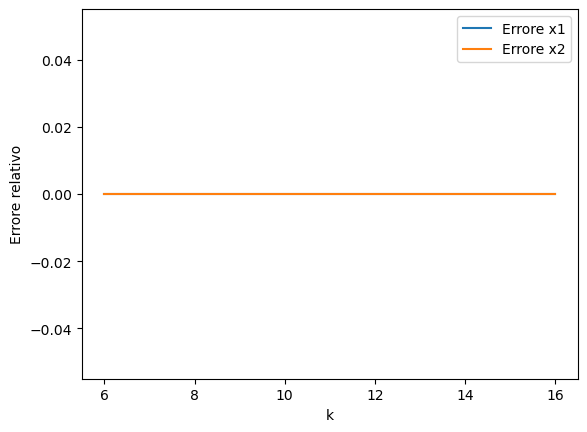

In [112]:
def formula(a, b, c):
    x1 = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)
    x2 = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)
    return x1, x2

def formula_better(a,b,c):
    x1 = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)
    x2 = c/(a*x1)
    return x1, x2

import numpy as np
import math
import matplotlib.pyplot as plt

# Definizione delle funzioni
a = 1
b = lambda k: 2**(2*k) - 3**(-2*k)
c = lambda k: -2**(2*k) * 3**(-2*k)

x1 = lambda k: -2**(2*k)
x2 = lambda k: 3**(-2*k)


err_rel_vec_x1 = []
err_rel_vec_x2 = []


k_values = np.linspace(6.0, 16.0, 11)
for k in k_values:
    x1k, x2k = formula_better(a, b(k), c(k))

    # Calcola gli errori relativi
    err_rel_x1 = abs(x1k - x1(k)) / abs(x1(k))
    err_rel_x2 = abs(x2k - x2(k)) / abs(x2(k))

    err_rel_vec_x1.append(err_rel_x1)
    err_rel_vec_x2.append(err_rel_x2)

# Plot degli errori relativi
plt.plot(k_values, err_rel_vec_x1, label='Errore x1')
plt.plot(k_values, err_rel_vec_x2, label='Errore x2')
plt.xlabel('k')
plt.ylabel('Errore relativo')
plt.legend()
plt.show()
